In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Abdelrahman\Downloads\Telegram Desktop\Titanic-Dataset2.csv")
data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


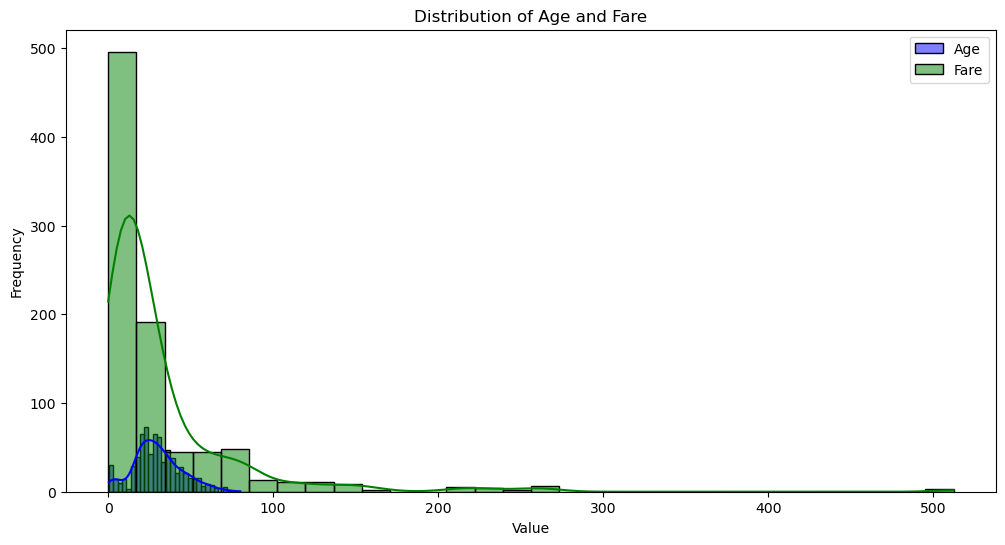

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue', label='Age')
sns.histplot(data['Fare'], kde=True, bins=30, color='green', label='Fare')
plt.title('Distribution of Age and Fare')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

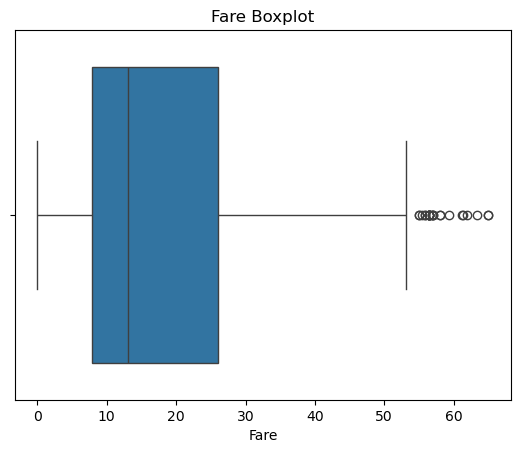

In [9]:
sns.boxplot(x=data['Fare'])
plt.title("Fare Boxplot")
plt.show()

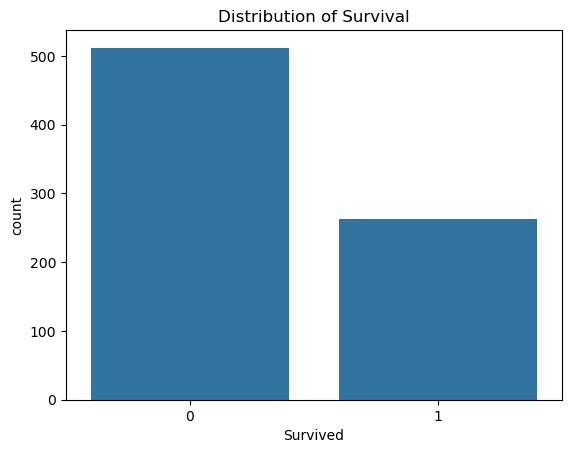

In [10]:
sns.countplot(data=data, x='Survived')
plt.title('Distribution of Survival')
plt.show()

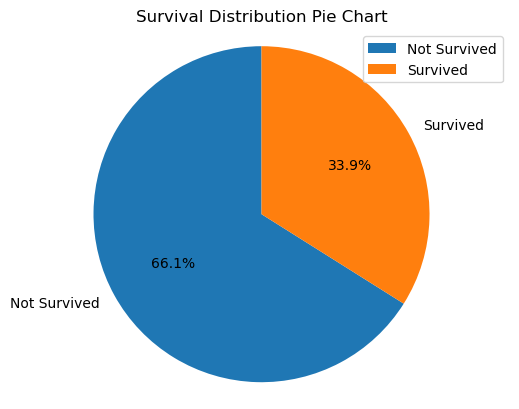

In [11]:
plt.pie(data['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution Pie Chart')
plt.axis('equal')
plt.legend(['Not Survived', 'Survived'])
plt.show()

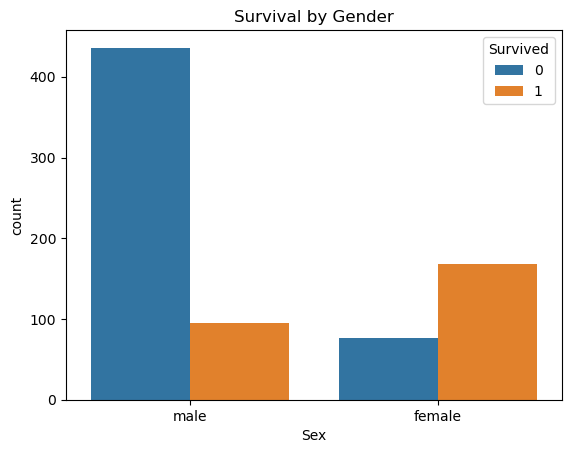

In [12]:
sns.countplot(data=data,x='Sex',hue='Survived')
plt.title("Survival by Gender")
plt.show()

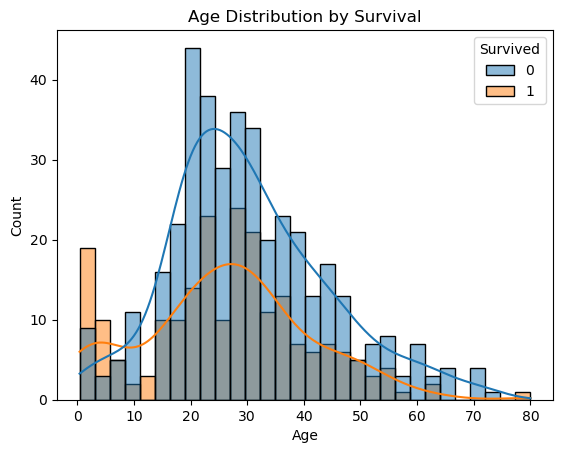

In [13]:
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

In [14]:
print("متوسط العمر:", data['Age'].mean())
print("الانحراف المعياري للعمر:", data['Age'].std())

متوسط العمر: 28.946574225122347
الانحراف المعياري للعمر: 14.368139363458516


In [15]:
survival_rate = data.groupby('Pclass')['Survived'].mean()
print(survival_rate)

Pclass
1    0.508929
2    0.486034
3    0.245868
Name: Survived, dtype: float64


In [16]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16320\411677293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16320\411677293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [17]:
data.drop(columns=['Cabin'],inplace=True)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

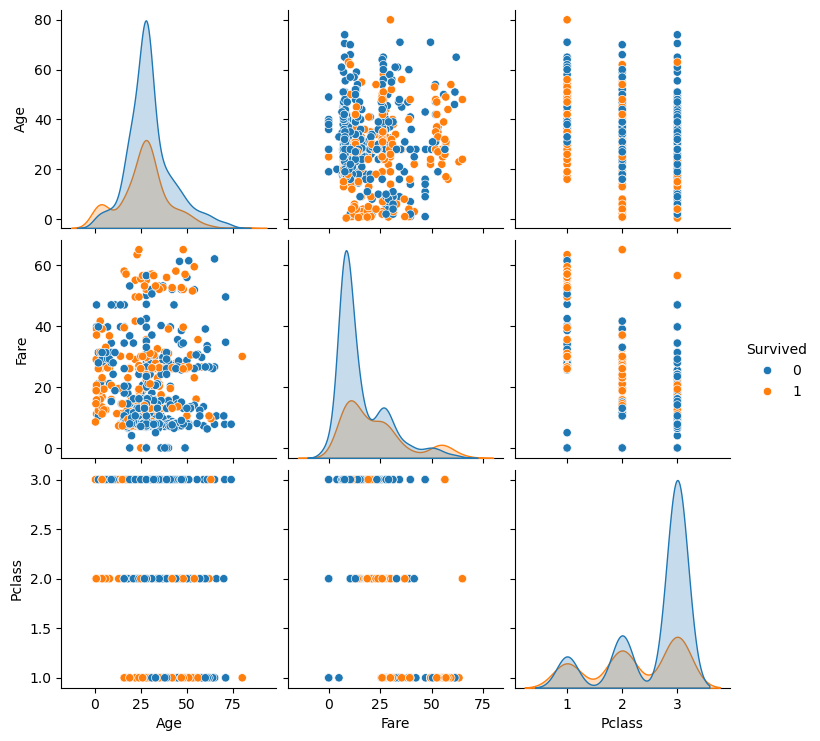

In [19]:
sns.pairplot(data[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

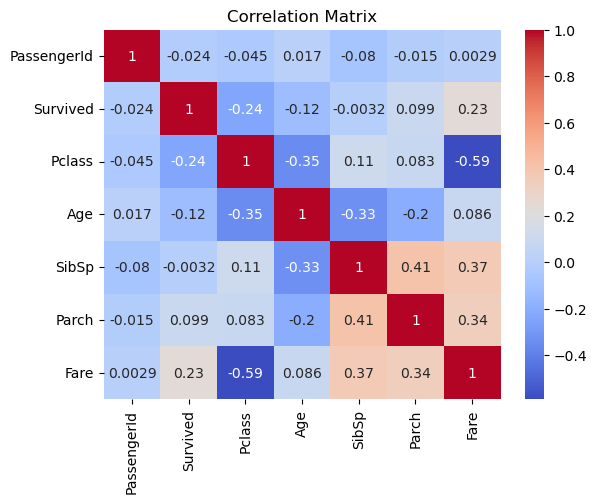

In [20]:
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16320\2098851738.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16320\2098851738.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [22]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

print("Linear Regression Model Accuracy:", accuracy_score(y_test, y_pred.round()))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Linear Regression Model Accuracy: 0.7548387096774194
Mean Squared Error: 0.1823301177611021
R-squared: 0.23149454750693366


Logistic Regression Model Accuracy: 0.7741935483870968
Confusion Matrix:
 [[83 12]
 [23 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83        95
           1       0.76      0.62      0.68        60

    accuracy                           0.77       155
   macro avg       0.77      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155



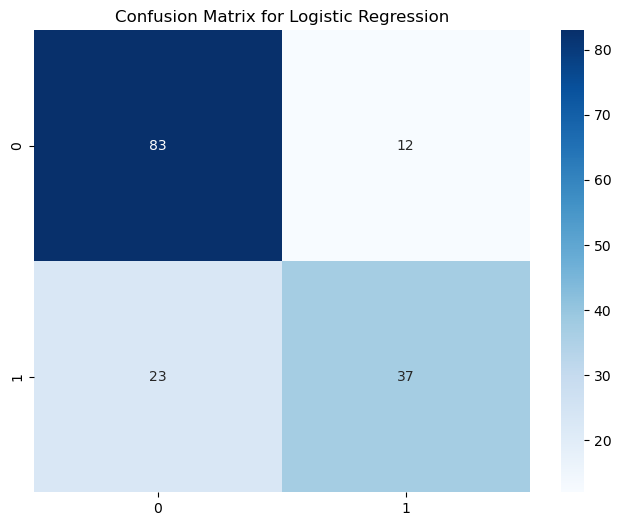

In [23]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [24]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_preds = tree_model.predict(x_test)

In [25]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
forest_preds = forest_model.predict(x_test)

Model: Logistic Regression
Accuracy: 0.7741935483870968
Confusion Matrix:
 [[83 12]
 [23 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83        95
           1       0.76      0.62      0.68        60

    accuracy                           0.77       155
   macro avg       0.77      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155

----------------------------------------
Model: Decision Tree
Accuracy: 0.7483870967741936
Confusion Matrix:
 [[76 19]
 [20 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        95
           1       0.68      0.67      0.67        60

    accuracy                           0.75       155
   macro avg       0.73      0.73      0.73       155
weighted avg       0.75      0.75      0.75       155

----------------------------------------
Model: Random Forest
Accuracy: 0.7

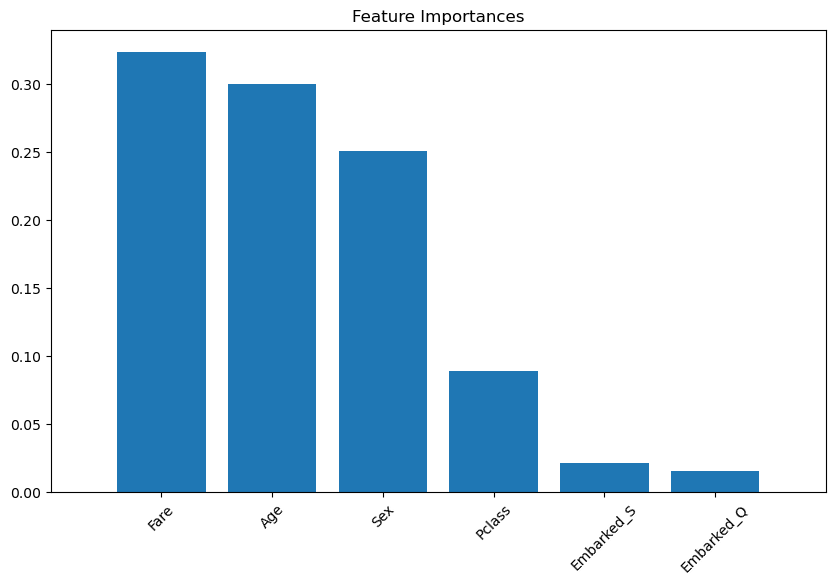

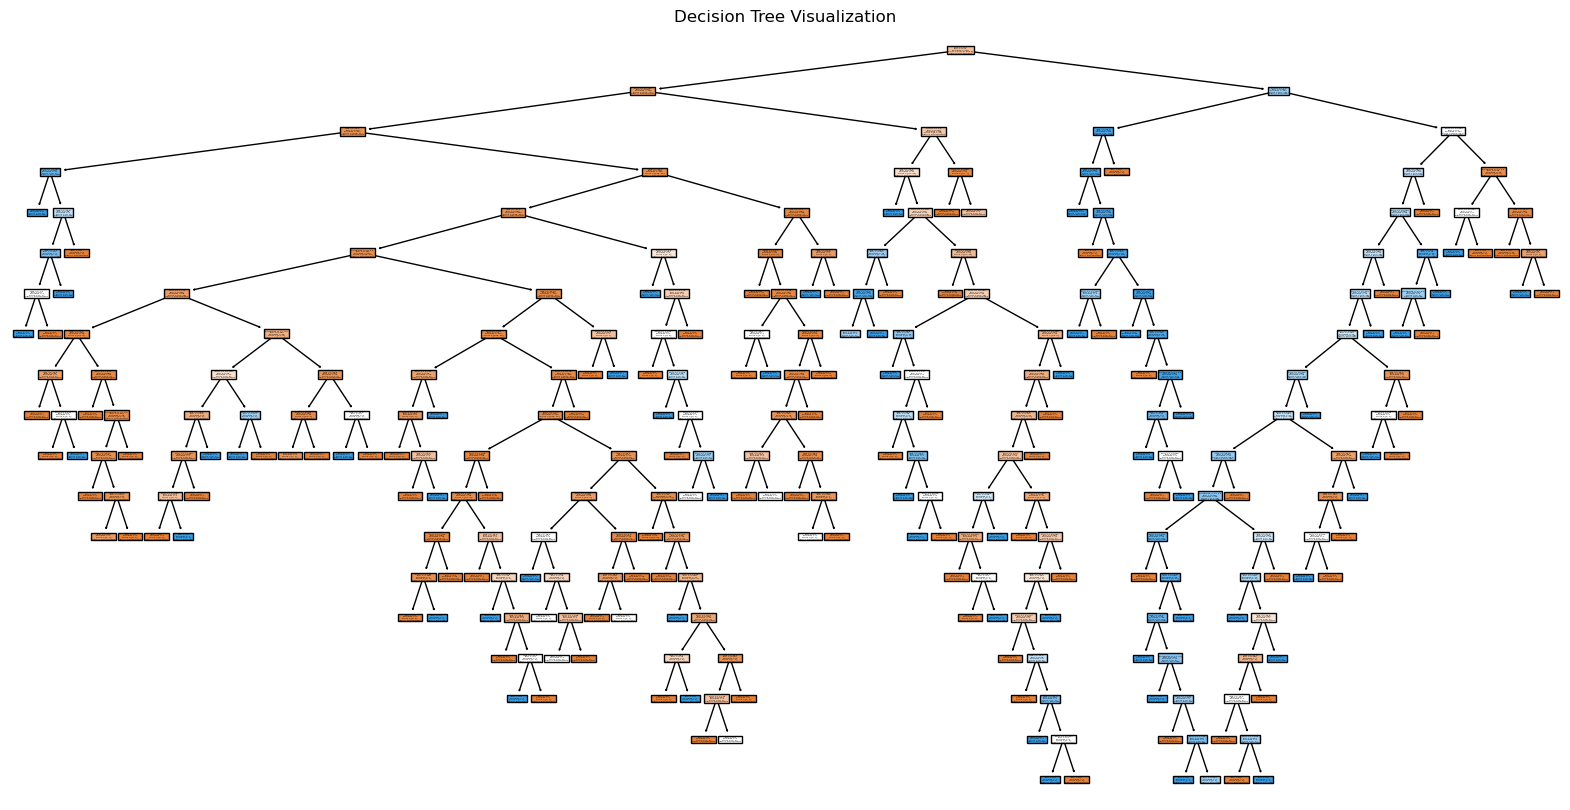

In [26]:
def evaluate_model(name, y_test, y_pred):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-'*40)

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, tree_preds)
evaluate_model("Random Forest", y_test, forest_preds)

# Visualizing feature importance for Random Forest
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), np.array(features)[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.show()

# Visualizing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = {}
for name ,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [29]:
result_df = pd.DataFrame(results).T
print(result_df)

               Accuracy  Precision    Recall  F1 Score
KNN            0.774194   0.745098  0.633333  0.684685
Decision Tree  0.761290   0.694915  0.683333  0.689076
Random Forest  0.780645   0.740741  0.666667  0.701754
SVM            0.748387   0.698113  0.616667  0.654867


<Figure size 1000x600 with 0 Axes>

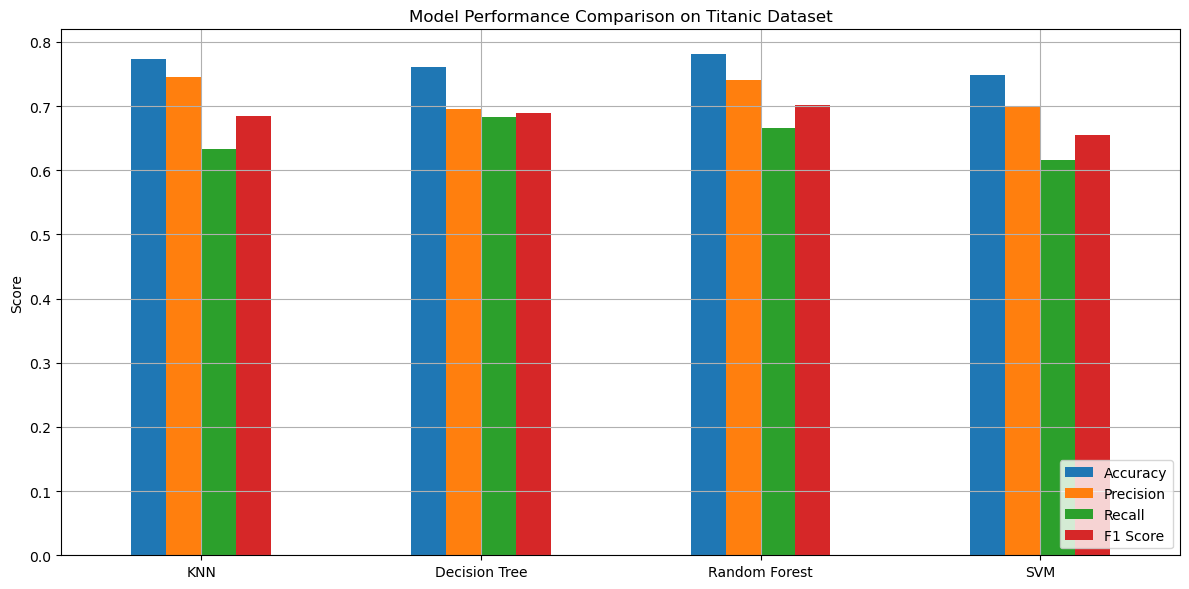

In [30]:
plt.figure(figsize=(10, 6))
result_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison on Titanic Dataset')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()